In [1]:
#Import Libraries

from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
from datetime import datetime
import re

### SCRAPE BOOMPLAY FOR SONGS AND ARTISTS

In [2]:
# URL
url='https://www.boomplay.com/playlists/26356675?from=home'

In [3]:
response = requests.get(url)
response
soup= BeautifulSoup(response.content, 'lxml')

In [4]:
#Dictionaries
song_name = {'song_name':[]}
artist = {'artist_name':[]}
time= []


In [5]:
#Getting the Song title and artist name 
#Song name
artist_list = []

song_data = soup.findAll('div', {'class':'songNameWrap'})
artist_data= soup.findAll('a', {'class':'artistName'})


index=1
while index < 31:
    name = song_data[index].text.replace('\n','').split('ft.')
    if len(name)>=2: 
        name=name[0]
        #print(name)
    else:
        name = name[0]
        #print(name)
    
    
    
    
    song_name['song_name'].append(name)
    index = index+1
#song title    
i = 0 
while i<30:
    artist_name = artist_data[i].text
    artist['artist_name'].append(artist_name)
    artist_list.append(artist_name)
    i = i+1


#### Programitic web search for artist's age

In [6]:
#loop for building the url
age_url =[]

for i in artist_list:
    first_C ="'"
    second_C ="'"
    url2= "https://en.wikipedia.org/wiki/"+ i
    
    age_url.append(url2)
    
    
    

In [7]:
age_url

['https://en.wikipedia.org/wiki/Ayra Starr',
 'https://en.wikipedia.org/wiki/Black Sherif',
 'https://en.wikipedia.org/wiki/Fireboy DML',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Show Dem Camp',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/CKay',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Victony',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Burna Boy',
 'https://en.wikipedia.org/wiki/Bella Shmurda',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Berri-Tiga',
 'https://en.wikipedia.org/wiki/CKay',
 'https://en.wikipedia.org/wiki/Pheelz',
 'https://en.wikipedia.org/wiki/Luddy Dave',
 'https://en.wikipedia.org/wiki/Oxlade',
 'https://en.wikipedia.org/wiki/Show Dem Camp',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wikipedia.org/wiki/Burna Boy',
 'https://en.wikipedia.org/wiki/Idowest',
 'https://en.wikipedia.org/wiki/Asake',
 'https://en.wik

In [8]:
#getting and storing the artist age
error = []
artist_age = {'a_age':[]}
n=0
pattern = "[0-9]{4}|[0-9]{2}|[0-9]{2}"
for j in age_url:
    
    response1 = requests.get(j)

    try:
        soup1 = BeautifulSoup(response1.content,'html.parser')
        age_data = soup1.select_one('span span',{'class':'bday'})
        age = age_data.text
       #checking if the the age data mathes the pattern 
        if (re.search(pattern, age)):
            artist_age['a_age'].append(age)
        else:
            artist_age['a_age'].append('NA')

    except AttributeError:
        artist_age['a_age'].append('NA')
        error.append('NA')              
        print('NA')

NA
NA
NA
NA
NA


In [9]:
pd.DataFrame(artist_age)

,a_age
0,2002-06-14
1,2002-01-09
2,1996-02-05
3,1995-01-13
4,NA
5,1995-01-13
6,1995-07-16
7,1995-01-13
8,2001-01-05
9,1995-01-13


In [10]:

response1 = requests.get('https://en.wikipedia.org/wiki/Burna_Boy')
soup1 = BeautifulSoup(response1.content,'html.parser')
age_data = soup1.select_one('span span',{'class':'bday'})


In [11]:
age_data.text

'1991-07-02'

In [12]:
artist_age

{'a_age': ['2002-06-14',
  '2002-01-09',
  '1996-02-05',
  '1995-01-13',
  'NA',
  '1995-01-13',
  '1995-07-16',
  '1995-01-13',
  '2001-01-05',
  '1995-01-13',
  '1991-07-02',
  '1996-01-27',
  '1995-01-13',
  'NA',
  '1995-07-16',
  '1994-06-05',
  'NA',
  'NA',
  'NA',
  '1995-01-13',
  '1991-07-02',
  'NA',
  '1995-01-13',
  '1949',
  'NA',
  'NA',
  '1949',
  '1995-01-13',
  'NA',
  'NA']}

In [13]:
#Getting run_time
time = {'time':[]}

for t in range(30):
    time_data = soup.findAll('li',{'class':'clearfix play_one'})
    time['time'].append(time_data[t].time.text)




#### Creating DataFrames

In [14]:
song_name = pd.DataFrame(song_name)

In [15]:
artist_name = pd.DataFrame(artist)

In [16]:
artist_age = pd.DataFrame(artist_age)

In [17]:
run_time = pd.DataFrame(time)

In [18]:
artist_name.index.set_names('No',inplace = True)
artist_age.index.set_names('No',inplace = True)
song_name.index.set_names('No',inplace = True)
run_time.index.set_names('No', inplace = True)

In [19]:
df1 = song_name.merge(artist_name, on='No')
df2= df1.merge(artist_age, on='No')
df=df2.merge(run_time, on='No')

In [20]:
df

,song_name,artist_name,a_age,time
No,,,,
0,Rush,Ayra Starr,2002-06-14,03:05
1,Soja,Black Sherif,2002-01-09,03:01
2,Bandana,Fireboy DML,1996-02-05,02:58
3,Organise,Asake,1995-01-13,02:03
4,Mine Alone,Show Dem Camp,NA,03:07
5,Joha,Asake,1995-01-13,02:28
6,samson and delilah (feat. Mayra Andrade),CKay,1995-07-16,03:14
7,Dull,Asake,1995-01-13,01:40
8,Soweto,Victony,2001-01-05,02:28


#### Cleaning

In [21]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    30 non-null     object
 1   artist_name  30 non-null     object
 2   a_age        30 non-null     object
 3   time         30 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [22]:
#replacing NA and [ with  null values and changing a_age column to datetime datatime

df.replace(['NA','[','Find sources:\xa0"B-Red"\xa0–\xa0news\xa0· newspapers\xa0· books\xa0· scholar\xa0· JSTOR'],np.nan, inplace = True)

df.a_age = pd.to_datetime(df.a_age)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   song_name    30 non-null     object        
 1   artist_name  30 non-null     object        
 2   a_age        20 non-null     datetime64[ns]
 3   time         30 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ KB


In [23]:
#checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   song_name    30 non-null     object        
 1   artist_name  30 non-null     object        
 2   a_age        20 non-null     datetime64[ns]
 3   time         30 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ KB


In [24]:
df

,song_name,artist_name,a_age,time
No,,,,
0,Rush,Ayra Starr,2002-06-14,03:05
1,Soja,Black Sherif,2002-01-09,03:01
2,Bandana,Fireboy DML,1996-02-05,02:58
3,Organise,Asake,1995-01-13,02:03
4,Mine Alone,Show Dem Camp,NaT,03:07
5,Joha,Asake,1995-01-13,02:28
6,samson and delilah (feat. Mayra Andrade),CKay,1995-07-16,03:14
7,Dull,Asake,1995-01-13,01:40
8,Soweto,Victony,2001-01-05,02:28


In [25]:
#getting the exact age of each artist and putting the result in a new column
df['age']=datetime.today().year - df.a_age.dt.year 

In [26]:
df.rename(columns={'a_age':'dob'}, inplace = True)

In [27]:
df

,song_name,artist_name,dob,time,age
No,,,,,
0,Rush,Ayra Starr,2002-06-14,03:05,20.0
1,Soja,Black Sherif,2002-01-09,03:01,20.0
2,Bandana,Fireboy DML,1996-02-05,02:58,26.0
3,Organise,Asake,1995-01-13,02:03,27.0
4,Mine Alone,Show Dem Camp,NaT,03:07,NaN
5,Joha,Asake,1995-01-13,02:28,27.0
6,samson and delilah (feat. Mayra Andrade),CKay,1995-07-16,03:14,27.0
7,Dull,Asake,1995-01-13,01:40,27.0
8,Soweto,Victony,2001-01-05,02:28,21.0


In [28]:
df.to_csv("Top_Naija_Music_Trends_Boom_play.csv")

### Visualization

In [29]:
from matplotlib import pyplot as plt
import seaborn as sb

In [30]:
df['artist_name'].unique()

array(['Ayra Starr', 'Black Sherif', 'Fireboy DML', 'Asake',
       'Show Dem Camp', 'CKay', 'Victony', 'Burna Boy', 'Bella Shmurda',
       'Berri-Tiga', 'Pheelz', 'Luddy Dave', 'Oxlade', 'Idowest', 'Ruger',
       'Idahams', 'Zinoleesky', 'Portable'], dtype=object)

In [31]:
group = df.groupby([df.artist_name]).size()
group

artist_name
Asake            8
Ayra Starr       1
Bella Shmurda    1
Berri-Tiga       1
Black Sherif     1
Burna Boy        2
CKay             2
Fireboy DML      1
Idahams          1
Idowest          1
Luddy Dave       1
Oxlade           1
Pheelz           1
Portable         1
Ruger            2
Show Dem Camp    3
Victony          1
Zinoleesky       1
dtype: int64

Text(0.5, 1.0, 'ARTIST WTIH THE MOST AMOUNT OF TRENDING SONGS')

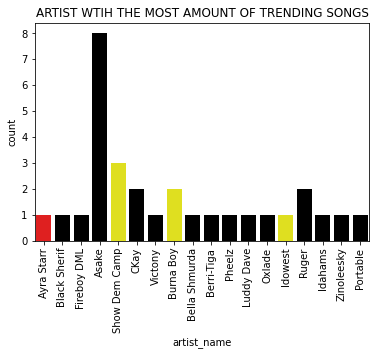

In [32]:
#Making the visualization
color=('red','black','black','black','yellow','black','black','yellow','black','black','black','black','black','yellow','black','black','black','black','black','black','black',)
sb.countplot(data = df, x=df.artist_name, palette=color)
plt.xticks(rotation = 90)
plt.title('ARTIST WTIH THE MOST AMOUNT OF TRENDING SONGS')